## Sem normalizar (quebra)

In [101]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

In [102]:
data = pd.read_csv('train (copy).csv')
data_test = pd.read_csv('test.csv')
data_target = pd.read_csv('test_target.csv')
test = pd.read_csv('test_data.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/04/18/may-fourth-be-w...,630.0,12.0,363.0,0.571823,1.0,0.773585,5.0,3.0,1.0,...,0.033333,1.0,-0.250000,-0.4,-0.150000,0.571429,0.357143,0.071429,0.357143,5100
1,http://mashable.com/2014/05/23/edgar-wright-sh...,230.0,11.0,502.0,0.591919,1.0,0.777778,6.0,1.0,2.0,...,0.100000,0.8,-0.304167,-0.7,-0.050000,0.000000,0.000000,0.500000,0.000000,3100
2,http://mashable.com/2013/01/24/dont-count-appl...,714.0,6.0,951.0,0.433761,1.0,0.658635,22.0,19.0,1.0,...,0.062500,1.0,-0.317357,-1.0,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
3,http://mashable.com/2014/08/09/8-ice-cream-rec...,151.0,9.0,496.0,0.569072,1.0,0.712934,10.0,3.0,1.0,...,0.050000,0.6,-0.188542,-0.4,-0.050000,0.000000,0.000000,0.500000,0.000000,1400
4,http://mashable.com/2013/01/11/marlon-wayans-h...,727.0,8.0,148.0,0.721088,1.0,0.865979,6.0,2.0,0.0,...,0.033333,1.0,-0.116667,-0.2,-0.033333,0.750000,0.800000,0.250000,0.800000,1000


In [103]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,354.478543,10.396090,546.736560,0.552612,1.003058,0.693278,10.873120,3.284692,4.553271,1.255021,...,0.095348,0.757242,-0.259586,-0.521935,-0.107494,0.280653,0.072275,0.342450,0.155627,3364.264386
std,213.799596,2.117283,472.670058,3.935691,5.848093,3.649376,11.375126,3.851006,8.372558,4.112758,...,0.071104,0.248184,0.127366,0.289919,0.094823,0.323644,0.265180,0.188618,0.226548,10742.884480
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,166.000000,9.000000,247.000000,0.471080,1.000000,0.625791,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328359,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,339.000000,10.000000,410.000000,0.538784,1.000000,0.690476,7.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,541.000000,12.000000,716.000000,0.608871,1.000000,0.754717,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.187226,-0.300000,-0.050000,0.500000,0.142857,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,690400.000000


In [104]:
len(data[data.shares < 150000])

31697

In [105]:
data = data[data.shares < 150000]

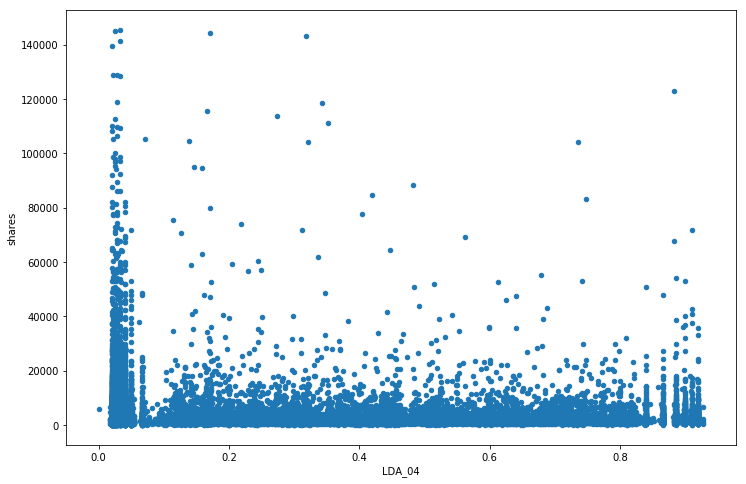

In [106]:
data.plot(kind='scatter', x='LDA_04', y='shares', figsize=(12,8))

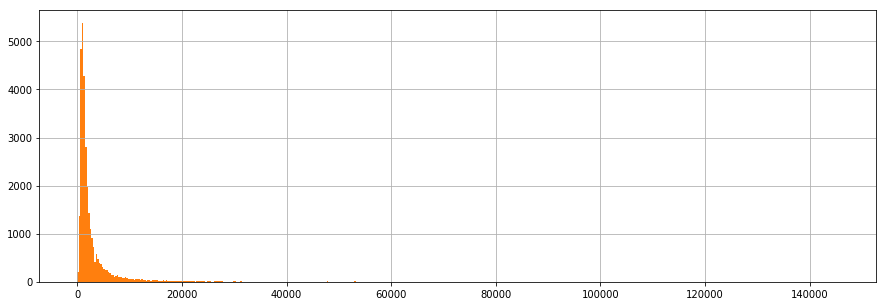

In [107]:
data['shares'].hist(bins=500, figsize=(15,5));data['shares'].hist(bins=500, figsize=(15,5));

In [108]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [109]:
cols = data.shape[1]
X = data.iloc[:,2:cols-1]  
y = data.iloc[:,cols-1:cols]
X.insert(0, 'Ones', 1)

X = np.matrix(X.values)
y = np.matrix(y.values)

In [110]:
theta = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]))

In [111]:
X.shape, theta.shape, y.shape

((31697, 59), (1, 59), (31697, 1))

In [8]:
computeCost(X, y, theta)

28682958.221740227

In [9]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [10]:
# initialize variables for learning rate and iterations
alpha = 0.000000000001
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)  
# print(g), print(cost)

In [15]:
computeCost(X, y, g)

23680231.70857172

Text(0.5,1,'Predicted LDA_04 vs. Shares')

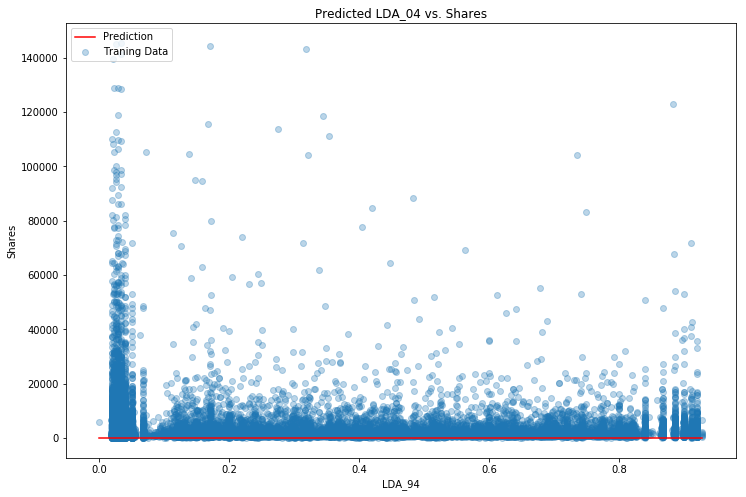

In [16]:
x = np.linspace(data.LDA_04.min(), data.LDA_04.max(), 100)  
    f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.LDA_04, data.shares, label='Traning Data', alpha=.3)  
ax.legend(loc=2)  
ax.set_xlabel('LDA_94')  
ax.set_ylabel('Shares')  
ax.set_title('Predicted LDA_04 vs. Shares')

Text(0.5,1,'Error vs. Training Epoch')

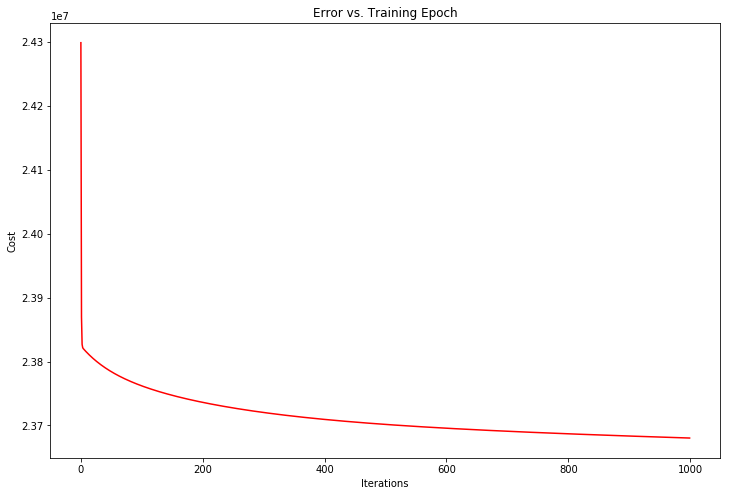

In [17]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

## Feature Normalization and 2+ variables

In [91]:
#prepando os dados
data2 = data[data.shares < 150000]
cols = data2.shape[1]
data2 = data2.iloc[:,2:cols]

In [92]:
#scaling e normalizando
data2 = data2 / (data2.max() - data2.min())
data2 = ((data2 - data2.mean()) / data2.mean())
data2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.154283,-0.335967,0.034700,-0.003114,0.115770,-0.540114,-0.086779,-0.780347,-0.202531,-0.007974,...,-0.650447,0.320558,-0.036883,-0.233601,0.395708,1.036047,3.938696,-0.791388,1.294888,0.597637
1,0.058093,-0.081696,0.071063,-0.003114,0.121817,-0.448137,-0.695593,-0.560694,-1.000000,0.086960,...,0.048660,0.056446,0.171792,0.341198,-0.534764,-1.000000,-1.000000,0.460287,-1.000000,-0.028888
2,-0.422858,0.739656,-0.215121,-0.003114,-0.050027,1.023498,4.783735,-0.780347,-1.000000,-0.073232,...,-0.344587,0.320558,0.222609,0.915998,-0.534764,-1.000000,-1.000000,0.460287,-1.000000,-0.592759
3,-0.134288,-0.092672,0.029722,-0.003114,0.028291,-0.080228,-0.086779,-0.780347,-1.000000,0.107201,...,-0.475670,-0.207665,-0.273650,-0.233601,-0.534764,-1.000000,-1.000000,0.460287,-1.000000,-0.561433
4,-0.230478,-0.729265,0.304792,-0.003114,0.249034,-0.448137,-0.391186,-1.000000,-0.202531,0.039805,...,-0.650447,0.320558,-0.550546,-0.616800,-0.689843,1.672312,10.062680,-0.269856,4.140548,-0.686738


In [115]:
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]  
y2 = data2.iloc[:,cols-1:cols]
# X2.insert(0, 'Ones', 1)

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
Y = data.shares.values
theta2 = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]))

# initialize variables for learning rate and iterations
alpha = 0.09
iters = 1000

X2.shape, y2.shape, theta2.shape

((31697, 58), (31697, 1), (1, 58))

In [116]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

/home/p4w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/home/p4w/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/p4w/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
/home/p4w/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


nan

Text(0.5,1,'Error vs. Training Epoch')

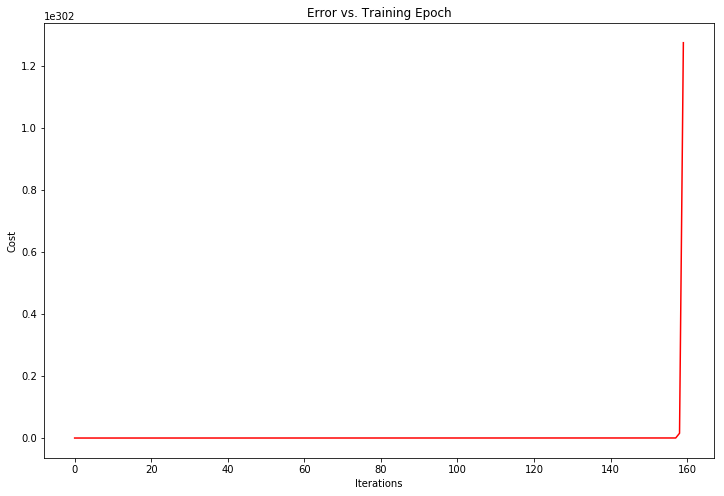

In [117]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost2, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

In [38]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
#     rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    rmse = np.sqrt(np.sum(np.asarray(Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum(np.asarray(Y - mean_y) ** 2)
    ss_res = np.sum(np.asarray(Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X2.dot(g2.T)

# d = np.sqrt(np.sum(np.asarray(y2 - Y_pred) ** 2) / len(y2))
# print(d)

print(rmse(y2, Y_pred))
print(r2_score(y2, Y_pred))

0.0465833217636518
0.026215698634237006


## Predição dos dados de teste:

In [46]:
#predict = g2 * x_test
data2 = data[data.shares < 150000]
cols = data2.shape[1]
data2 = data2.iloc[:,2:cols]

test_x = test.iloc[:,2:]

#Scaling and normalizing
# test_x = (test_x / (test_x.max() - test_x.min()))
# data2 = (data2 / (data2.max() - data2.min()))

test_x = test_x / (test_x.max() - test_x.min())
cols = test_x.shape[1]
test_y = test_x.iloc[:,cols-1:cols]
test_x = test_x.iloc[:,:cols-1]
# test_x.insert(0, 'Ones', 1)

# convert to matrices and initialize theta
test_x = np.matrix(test_x.values)
test_y = np.matrix(test_y.values)
print(test_y)

[[0.00260881]
 [0.00098898]
 [0.00166015]
 ...
 [0.00077197]
 [0.0011799 ]
 [0.00116211]]


In [47]:
computeCost(test_x, test_y, g2)

0.0001780073819566291

In [49]:
Y_pred = test_x.dot(g2.T)
print(rmse(test_y, Y_pred))
print(r2_score(test_y, Y_pred))

0.018868353502975777
-0.18160185183776445


In [200]:
# prediction = test_x.dot(params)
# prediction.tolist()

In [201]:
# m = len(test_y)
# for i in range(m):
#     error = test_y[i] - prediction[i]
# error = error / m
# error

In [202]:
# error = (prediction.sum() - test_y.sum()) / m
# error

## Normal Equation - closed-form solution

In [84]:
data3 = data[data.shares < 150000]

data3 = data3.iloc[:,2:]

cols = data3.shape[1]
X3 = data3.iloc[:,:cols-1]  
y3 = data3.iloc[:,cols-1:cols]
# X3.insert(0, 'Ones', 1)
# convert to matrices and initialize theta
X3 = np.matrix(X3.values)
y3 = np.matrix(y3.values)
print(X3.shape)

(31697, 58)


In [85]:
from numpy.linalg import inv
def get_best_param(X3, y3):  
    X_transpose = X3.T
    best_params = inv(X_transpose.dot(X3)).dot(X_transpose).dot(y3) 
    # normal equation  
    # theta_best = (X.T * X)^(-1) * X.T * y  
    return best_params # returns a list 

In [86]:
# X_b = np.c_[np.ones((len(X3), 1)), X3]
# X_b.shape
params = get_best_param(X3, y3)
# params

In [87]:
prediction = X3.dot(params)
prediction

matrix([[ 5089.33641572],
        [-1930.16871044],
        [ 4048.39716531],
        ...,
        [ 3538.29648768],
        [ 4780.24615953],
        [ 5867.23109331]])

In [89]:
error = (prediction.sum() - y3.sum()) / len(X3)
error

566.6296361919264

In [67]:
# test prediction  aqui ao invés de jogar X2 mesmo, tem que jogar
# a propria base de teste. e no final medir com o resultado do Y de TESTE
# para saber se acertou mesmo ou nao.

#Normalizando os dados e diminuindo a base
#predict = g2 * x_test
data3 = data[data.shares < 150000]
cols = data3.shape[1]
data3 = data3.iloc[:,2:cols]

# #Scaling and normalizing
# test_x = (test_x / (test_x.max() - test_x.min()))
# data3 = (data3 / (data3.max() - data3.min()))

test_x = test.iloc[:,2:]
# test_x = ((test_x - data3.mean()) / data3.mean())
cols = test_x.shape[1]
test_x = test_x.iloc[:,:cols-1]
# test_x.insert(0, 'Ones', 1)
cols = test_x.shape[1]
test_y = test_x.iloc[:,cols-1:cols] 

# convert to matrices and initialize theta
test_x = np.matrix(test_x.values)
test_y = np.matrix(test_y.values)
prediction = test_x.dot(params)

# y = h_Theta_X(Theta) = Theta.T * X  '
# prediction.tolist()

# error = test_y - prediction
# error

In [68]:
prediction = test_x.dot(params)
# y = h_Theta_X(Theta) = Theta.T * X  '
# prediction.tolist()

In [59]:
m = len(test_y)
for i in range(m):
    error = test_y[i] - prediction[i]
error = error.sum() / m
error

3.2622504577359273

In [69]:
error = (prediction.sum() - test_y.sum()) / m
error

61785.12430655759

In [ ]:
plt.plot(test_x, prediction, "r--")  
plt.plot(X, y, "b.")  
plt.axis() # x axis range 0 to 2, y axis range 0 to 15  
plt.show()

## Nando mimizando

In [31]:
np.random.seed(0)
thetas = np.random.rand(len(X2[0]))

In [28]:
def compute_cost(X, y, thetas):
  m = y.size
  y_pred = np.dot(X, thetas)
  errors = y_pred - y
  sqErrors = np.dot(errors.T, errors)

  cost = 1/(2*m) * sqErrors

  return errors, cost

def minimize(X, thetas, alpha, errors):
  m = len(X)
  thetas_count = thetas.size

  for i in range(thetas_count):
    feature_i = X[:, i]
    feature_i.shape = (m, 1)
    
    error = np.dot(errors, feature_i)

    thetas[i] = thetas[i] - alpha * (1/m) * error.sum()
    
  return thetas

def gradient_descent(X, y, thetas, alpha, iterations):
  m = y.size
  past_costs = []
  past_thetas = [thetas]

  for i in range(iterations):
    errors, cost = compute_cost(X, y, thetas)

    thetas = minimize(X, thetas, alpha, errors)

    past_costs.append(cost)
    past_thetas.append(thetas)

  return past_thetas, past_costs

## Using Sklearn

In [176]:
from sklearn import linear_model  
model = linear_model.LinearRegression()  
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Predicted Sahres vs. LDA_04')

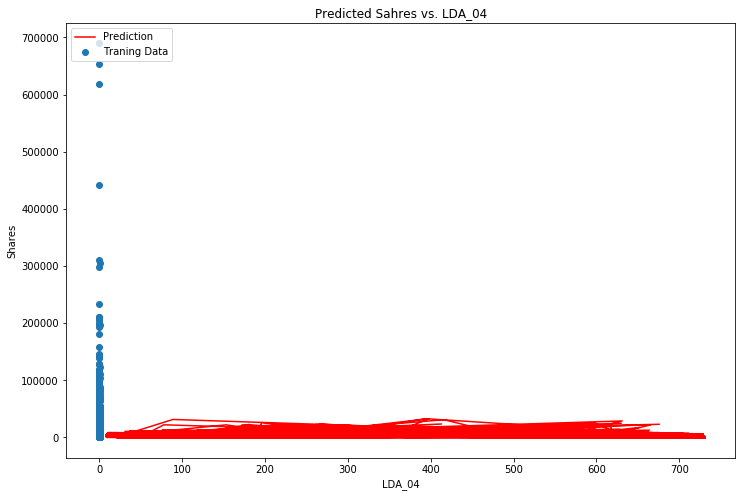

In [180]:
x = np.array(X[:, 1].A1)  
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.LDA_04, data.shares, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('LDA_04')  
ax.set_ylabel('Shares')  
ax.set_title('Predicted Sahres vs. LDA_04')  